# Learning how to use GNN

## data preparation for node classification

In [10]:
import torch
import networkx as nx
import numpy as np
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import matplotlib.pyplot as plt

### Load the Toy Dataset

In [2]:
graph_path = "./student_graph.graphml"
graph_nx = nx.read_graphml(graph_path)
print(graph_nx)

Graph with 100 nodes and 678 edges


Text(0.5, 1.0, 'Student Graph')

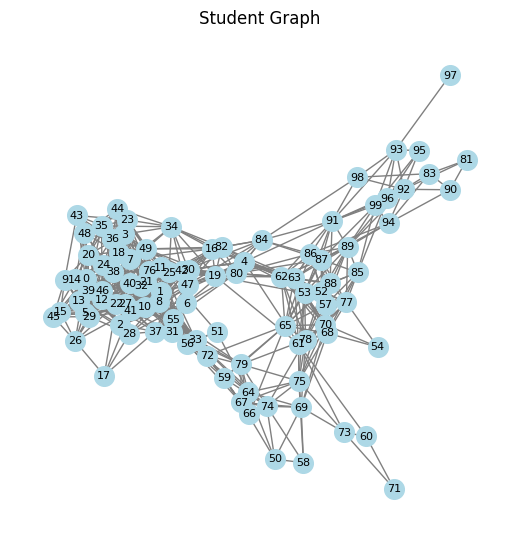

In [8]:
# plot the graph

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(graph_nx, seed=42)  # positions for all nodes
nx.draw(graph_nx, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=200, font_size=8)
plt.title("Student Graph")

In [9]:
graph_nx.nodes(data=True)

NodeDataView({'0': {'name': 'Student_0', 'club': 'Sports', 'like_sports': 0.7955415097609702, 'like_music': 0.22092986130263698, 'like_science': 0.043229593031232666}, '1': {'name': 'Student_1', 'club': 'Sports', 'like_sports': 0.5391393734668835, 'like_music': 0.4639886213674777, 'like_science': 0.10628242488369519}, '2': {'name': 'Student_2', 'club': 'Sports', 'like_sports': 0.7570436693055108, 'like_music': 0.01738607217224325, 'like_science': 0.44273534523038927}, '3': {'name': 'Student_3', 'club': 'Sports', 'like_sports': 0.788508191930243, 'like_music': 0.5265848394724645, 'like_science': 0.19326163051929218}, '4': {'name': 'Student_4', 'club': 'Sports', 'like_sports': 0.485804022702344, 'like_music': 0.4568754444233814, 'like_science': 0.49032284631155887}, '5': {'name': 'Student_5', 'club': 'Sports', 'like_sports': 0.7096290234245467, 'like_music': 0.16079924755089806, 'like_science': 0.006686683810232519}, '6': {'name': 'Student_6', 'club': 'Sports', 'like_sports': 0.463712645

Each node corresponds to a student with the following attributes : 
- Name
- club
- like_sports
- like_music
- like_science

Edges correspond to friendship between students

### Convert from networkx to pytorch geometric 

In [12]:
# convertion from networkx to pytorch geometric
graph_nx.graph = {}
data = from_networkx(graph_nx, group_node_attrs=["like_sports","like_music","like_science"])

### Check what is inside this object

In [17]:
print(data)
print(data.num_nodes)
print(data.x)
print(data.edge_index)

Data(edge_index=[2, 1356], name=[100], club=[100], x=[100, 3])
100
tensor([[7.9554e-01, 2.2093e-01, 4.3230e-02],
        [5.3914e-01, 4.6399e-01, 1.0628e-01],
        [7.5704e-01, 1.7386e-02, 4.4274e-01],
        [7.8851e-01, 5.2658e-01, 1.9326e-01],
        [4.8580e-01, 4.5688e-01, 4.9032e-01],
        [7.0963e-01, 1.6080e-01, 6.6867e-03],
        [4.6371e-01, 6.7684e-02, 4.6283e-01],
        [7.8664e-01, 2.9709e-01, 3.8989e-01],
        [5.0010e-01, 3.6287e-01, 1.0783e-01],
        [8.7970e-01, 1.7788e-01, 1.2040e-01],
        [5.3466e-01, 3.7802e-01, 0.0000e+00],
        [6.5995e-01, 5.9280e-01, 1.3134e-01],
        [7.6446e-01, 1.6210e-01, 1.9845e-01],
        [8.9997e-01, 9.2499e-02, 2.4825e-01],
        [9.1519e-01, 1.3469e-01, 2.7405e-01],
        [7.5238e-01, 9.4697e-03, 2.0946e-02],
        [5.1735e-01, 4.1870e-01, 4.1152e-01],
        [4.3422e-01, 6.9311e-02, 1.3107e-01],
        [8.0739e-01, 4.6717e-01, 2.5192e-02],
        [4.9686e-01, 5.4837e-01, 3.1980e-01],
        [8.63